<a href="https://colab.research.google.com/github/valesierrai/Analisis-Supervisado-para-el-AD/blob/main/Regresi%C3%B3n_Lineal_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Construcción de Modelos de Aprendizaje de Máquina con 'scikit-learn'

Esta biblioteca permite dar uniformidad a la creación de modelos de aprendizaje supervisados y no supervisados. A continuación daremos una descripción general de la API (Interfaz de Programación de Aplicaciones)

##Representación de los Datos

La mejor manera de pensar en los datos dentro de 'scikit-learn' es en términos de tablas de datos (datos estructurados). Una tabla es una cuadricula bidimensional, en la que las filas representan los elementos individuales, y las columnas las cantidades que están relacionadas con dichos elementos.

In [ ]:
#Se cargan las Librerias
from sklearn import datasets
import pandas as pd
import numpy as np

#Cargamos la base de datos Iris, el parámetro as_frame la obliga a cargar como tabla
iris = datasets.load_iris(as_frame=True).frame

#Renombrar la variable objetivo (la variable a predecir)
iris.rename({'target': 'species'}, axis=1, inplace = True)

#Cambiamos los valores de la vaiable objetivo de númericos a categóricos
iris['species']=iris['species'].map({0:'setosa',1:'versicolor',2:'virginica'})

#Mostramos la Base de Datos
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


En el conjunto de datos mostrado anteriormente cada fila hace referencia a una sola flor observada, y el número de filas es el número total de flores del conjunto de datos. Nos referimos a las filas de la matriz como **muestra** u **observaciones** y el número de filas se denominan $n\_samples$

Asimismo, cada columna de los datos hace referencia a un dato cuantitativo que describe cada muestra. En general, nos referimos a las columnas de la matriz o tabla como **caracteríticas** y el número de columnas de denominan $n\_features$

La matriz de características denominada $\mathbf {X}$ tendrá entonces dimensión $n\_samples \times n\_features$

In [ ]:
#Construimos nuestra matriz de características para la base de datos Iris

X= iris.drop('species', axis=1).copy()
#Visualizamos
X

In [ ]:
#Revisamos las dimensiones de X
X.shape

(150, 4)

La matriz objetivo por su parte contendrá los datos que queremos predecir, bien sea discretos para la clasificación o continuos para la regresión. Usualmente la matriz objetivo es llamada $y$ y tiene dimensión $n\_samples \times n\_targets$, donde $n\_targets$ es el número de datos a predecir.

In [ ]:
#Construimos la matriz objetivo
y=iris['species'].copy()

#Visualizamos
y

In [ ]:
#Revisamos las dimensiones
y.shape

(150,)

##Pasos para implementar un modelo con la API de estimadores de sckit-learn

Por lo general, los pasos para generar la API de estimados de 'scikit-learn' son los siguientes:

1. Elija una clase de modelo importando la clase de estimador adecuada de 'scikit-learn'. (Basicamente elegir el modelo)
2. Elija los hiperparámetros del modelo creando una instancia de esta clase con los valores deseados.
3. Organice los datos en una matriz de características y en un vector objetivo siguiendo la discución anterior. (Organizar)
4. Ajuste el modelo a los datos llamados al método de la instancia del modelo 'fit()'. (Entrenelo)
5. Aplique el modelo a nuevos datos:
>> - Para el aprendizaje supervisado, a menudo predecimos etiquetas para datos desconocidos utilizando el método 'predict()'
>> - Para el aprendizaje no supervisado, a menudo transformamos o inferimos propiedades de los datos utilizando los métodos 'transform()' o 'predict()'


#Regresión Simple Lineal

Como ejemplo de este proceso, consideremos un regresión lineal simple, es decir un caso común de ajustar una recta $(x,y)$ a los datos.

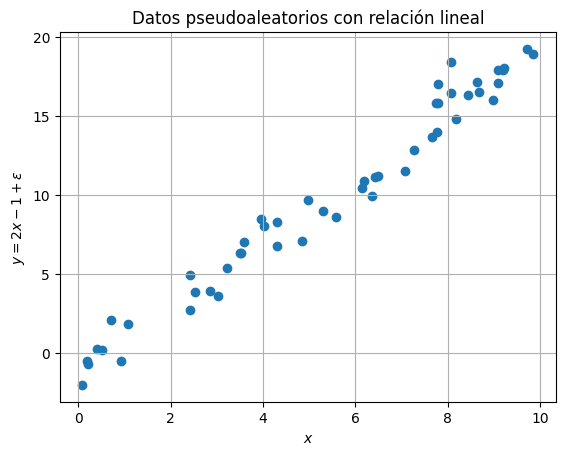

In [ ]:
#Generamos datos aleatorios para la prueba
import matplotlib.pyplot as plt

#Fijamos una semilla para los datos pseudoaleatorios
rng= np.random.RandomState(55)

#Generamos la variable independiente x
x= 10* rng.rand(50)

#Generamos la varibale dependiente
y= 2*x-1 +rng.randn(50)

#Gráficamos la Información
plt.scatter(x,y)
plt.grid()
plt.title('Datos pseudoaleatorios con relación lineal')
plt.xlabel('$x$')
plt.ylabel('$y = 2x - 1 + \epsilon$')
plt.show()

1. Elegir una clase de modelo

En nuestro caso elegiremos la regresión lineal simple

In [ ]:
from sklearn.linear_model import LinearRegression

2. Elegir la hiperparámetros del modelo

In [ ]:
#Para los hiperparámetros solamente vamos a elegir que ajuste el intercepto

#Instanciamos el Modelo
model= LinearRegression(fit_intercept=True)

3. Organizar los datos en una matriz de características

In [ ]:
#Revisamos las dimensiones de x
x.shape

(50,)

In [ ]:
#Agregamos una dimensión en las columnas
X=x[:,np.newaxis] #Agregar una dimensión que no metio ningún dato, es más de formato
X.shape

(50, 1)

In [ ]:
#Revisamos las dimensiones de y
y.shape #Este formato si me sirve porque es un vector, mientras que en x teniamos que tener una matriz

(50,)

4. Ajustar el modelo (Entrenar)

In [ ]:
#Entrenamos el modelo
model.fit(X,y)

LinearRegression()

In [ ]:
#Revisamos los parámetros del modelo
model.coef_ #Es como el W1
model.intercept_

-1.228112994208125

5. Predecir etiquetas para datos desconocidos

In [ ]:
#Generamos los datos de test (datos desconocidos)
xfit= np.linspace(-1,11) #Crea un vector de datos linealmente espaciados

#Ajustamos la dimensión para que se ajuste a la matriz de características
Xfit= xfit[:,np.newaxis]

#Hacemos la predicción de los datos nuevos
yfit= model.predict(Xfit)

Finalmente visualizamos los Resultados

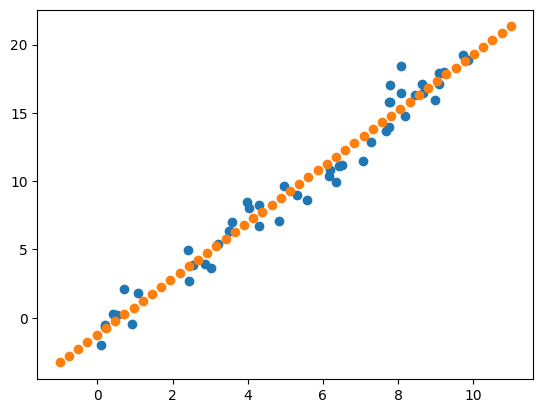

In [ ]:
#Primero gráficamos los datos sin procesar y luego el ajuste
plt.scatter(x,y)
plt.scatter(xfit,yfit)
plt.show()

#Yo le enseñe con los puntos azules y los valide con los naranjas